In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## 10.1 Exploring historical stock prices 

# read csv file 

data = pd.read_csv('AAPL_2008-2017.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 8 columns):
Date         2277 non-null object
Open         2277 non-null float64
High         2277 non-null float64
Low          2277 non-null float64
Close        2277 non-null float64
Volume       2277 non-null int64
Adj Close    2277 non-null float64
Return       2277 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 142.4+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close,Return
count,2277.000000,2277.000000,2277.000000,2277.000000,2.277000e+03,2277.000000,2277.000000
mean,274.494519,277.194989,271.448239,274.382617,1.178316e+08,63.594864,0.001021
std,178.785068,180.160792,177.098407,178.631157,8.676690e+07,34.916424,0.020137
min,79.390001,82.000001,78.200001,78.200001,1.142440e+07,10.175483,-0.179195
25%,115.199997,116.349998,113.889999,115.150002,5.579100e+07,31.645493,-0.008304
50%,197.380005,199.750006,194.549994,196.479998,9.695420e+07,60.711979,0.000985
75%,425.100010,428.249989,421.169987,425.659996,1.518853e+08,94.675878,0.011341
max,702.409988,705.070023,699.569977,702.100021,8.432424e+08,130.289993,0.139050


In [7]:
## 10.2 Exploring Alcohol Consumptions Across Nations

data = pd.read_csv('drinks_data.csv')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [10]:
# a) which continent drinks the most beer on average? 

# select all indexes for given continent (AF, EU, etc. )
# sum the values for beer, spirit and wine servings

In [11]:
sum_dr = data[['beer_servings','spirit_servings','wine_servings','continent']].groupby(['continent']).sum()

In [12]:
sum_dr

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,3258,866,862
AS,1630,2677,399
EU,8720,5965,6400
OC,1435,935,570
SA,2101,1377,749


In [13]:
sum_dr['beer_servings']

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

Europe drinks the most beer. 

In [14]:
sum_dr.iloc[0]

beer_servings      3258
spirit_servings     866
wine_servings       862
Name: AF, dtype: int64

In [15]:
# b) number of countries drinking over 50 servings of beer 

# set countries count = 0
# iterate through values in beer_servings 
# if value > 50 
# increase countries count by 1 
# return countries count 

In [16]:
num_countries = 0 

beer = data['beer_servings']

for elem in beer: 
    if elem > 50: 
        num_countries += 1

print(num_countries)

114


([<matplotlib.axis.XTick at 0x1a1e71e8d0>,
 <a list of 3 Text xticklabel objects>)

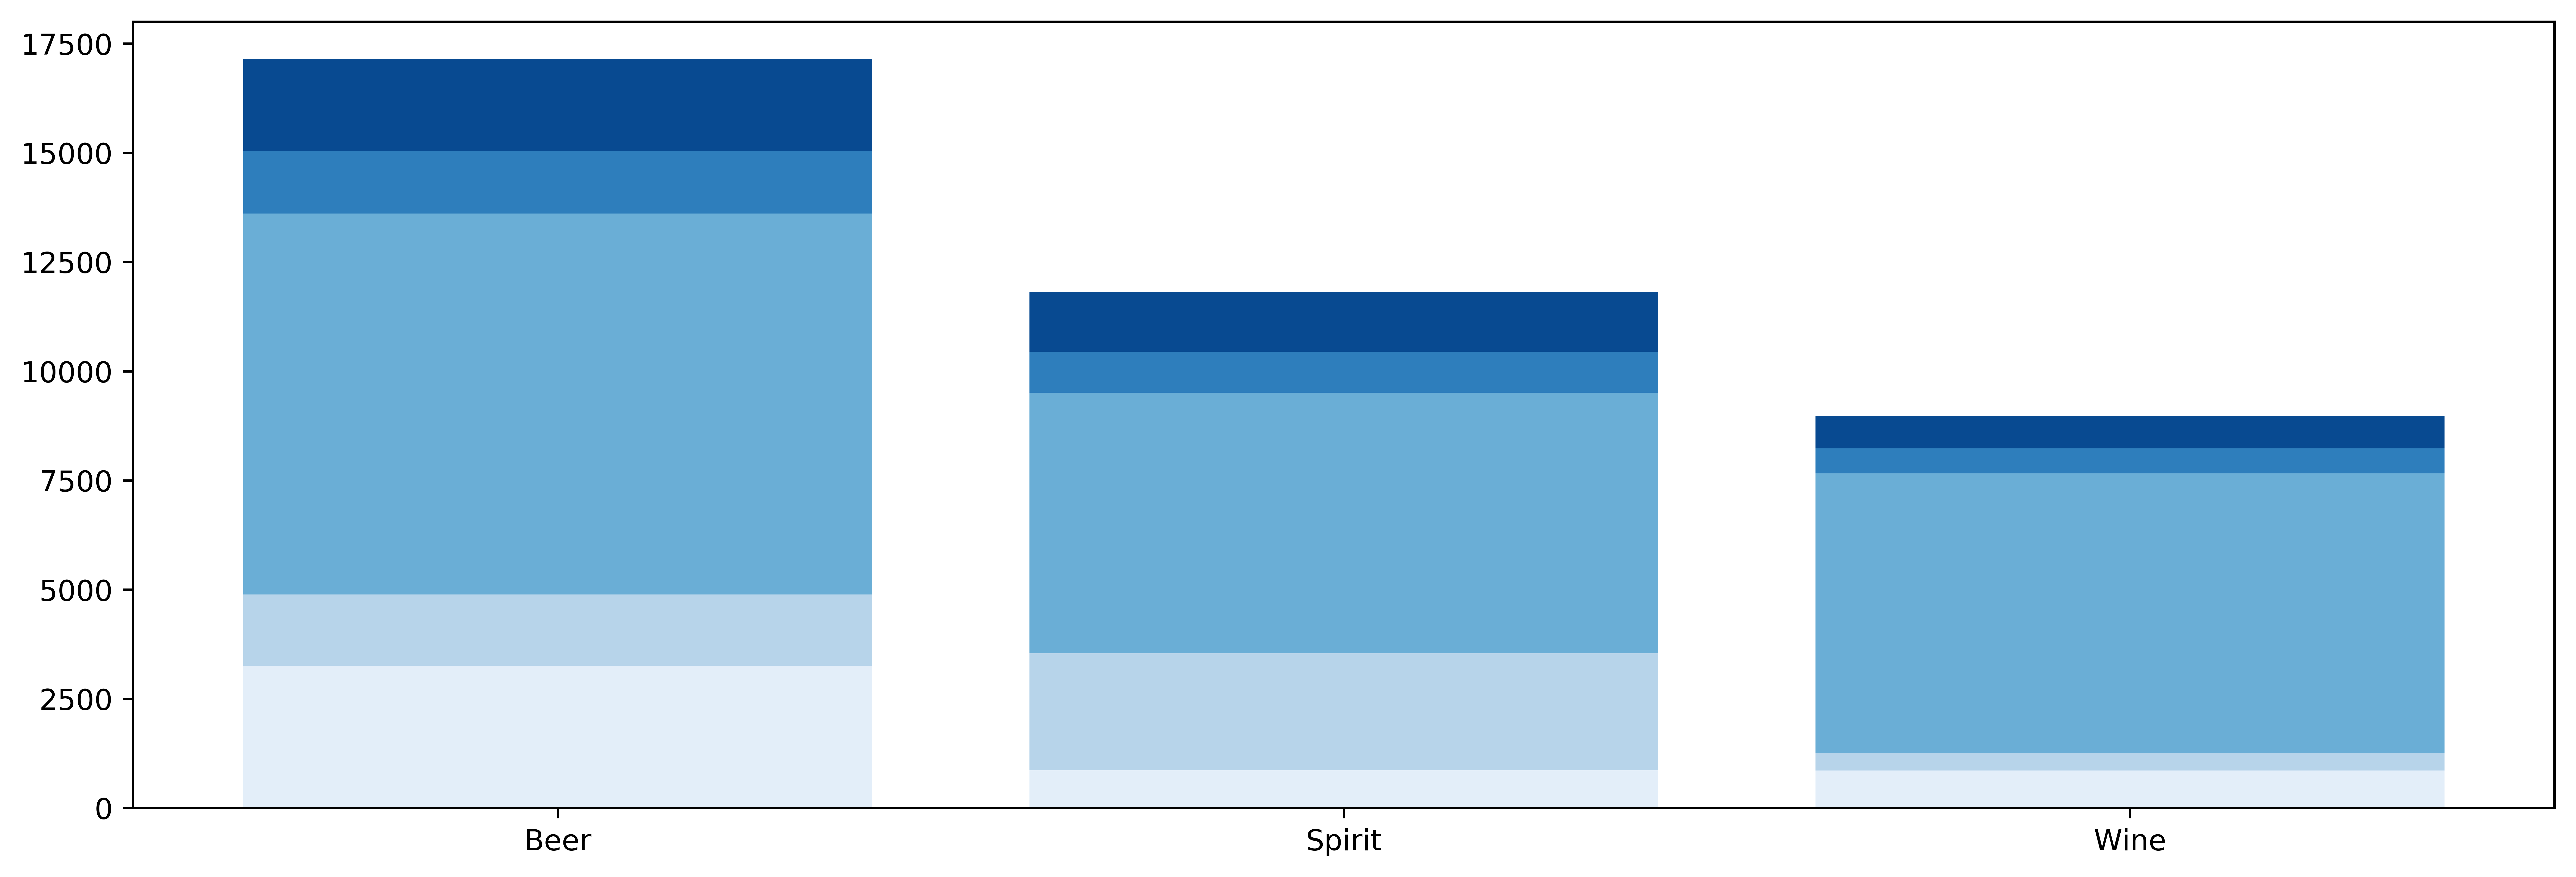

In [26]:
# Plotting stacked bar graph

r = np.arange(3)  # the number of bars 

a = sum_dr.iloc[0]
b = sum_dr.iloc[1]
c = sum_dr.iloc[2]
d = sum_dr.iloc[3]
e = sum_dr.iloc[4]


plt.figure(figsize = (15,5), dpi = 800)
cmap = plt.get_cmap('Blues')
plt.bar(r,a, color = cmap(0.1))
plt.bar(r,b, bottom = a, color = cmap(0.3))
plt.bar(r,c, bottom = a+b, color = cmap(0.5))
plt.bar(r,d, bottom = a+b+c, color = cmap(0.7))
plt.bar(r,e, bottom = a+b+c+d, color = cmap(0.9))

cols = ["Beer", "Spirit", "Wine"]

plt.xticks([0, 1, 2], cols)

